In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- *Name :* *Smruti Sonekar*
- *Branch :* *TY CSE DS*
- *UID :* *2021700064*
- *EXP NO :* *1*
- *Topic :* *Exploratory Data Analysis*

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often employing statistical graphics and other data visualization methods. The primary goal of EDA is to gain insight into the data and its underlying structure, rather than to confirm or refute specific hypotheses. It involves examining the data for patterns, trends, outliers, and other interesting features.

Key components of exploratory data analysis typically include:

Summary Statistics: Calculating basic statistical measures such as mean, median, mode, standard deviation, range, etc., to understand the central tendency and spread of the data.

Data Visualization: Creating visual representations of the data using plots, charts, histograms, scatter plots, box plots, etc., to explore relationships, distributions, and patterns within the data.

Identification of Outliers: Identifying data points that significantly deviate from the rest of the dataset, which might require further investigation.

Data Cleaning: Addressing missing values, inconsistencies, and errors in the dataset to ensure the quality and reliability of the analysis.

Feature Engineering: Creating new variables or transforming existing ones to better represent the underlying patterns in the data.

Dimensionality Reduction: Techniques like principal component analysis (PCA) or t-distributed stochastic neighbor embedding (t-SNE) can be used to reduce the dimensionality of the data while preserving its important features.

Pattern Discovery: Exploring relationships and correlations between variables to uncover patterns or trends that may provide insights into the data.

In [41]:
d1=pd.DataFrame(pd.read_csv("./files/ds_salaries.csv"))
d1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


**1. TO CHECK THE DATASET , WE WILL CHECK ITS SHAPE, STATISTICS, ITS DTYPES**

In [42]:
d1.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [43]:
d1.shape

(3755, 11)

In [44]:
d1.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [45]:
d1.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


**2. DATA PROCESSING STEP, AS ALL THE COLUMNS DO NOT HAVE ANY NULL VALUES, WE WILL CHECK IF THERE ARE ANY DUPLICATES**
- IF DUPLIICATES FOUND, WE WILL REMOVE THEM

In [46]:
duplicate_rows = d1[d1.duplicated()]
print("Total no of duplicates rows: ",d1.duplicated().sum())
print("Duplicate rows:")
print(duplicate_rows)

Total no of duplicates rows:  1171
Duplicate rows:
      work_year experience_level employment_type           job_title  salary  \
115        2023               SE              FT      Data Scientist  150000   
123        2023               SE              FT  Analytics Engineer  289800   
153        2023               MI              FT       Data Engineer  100000   
154        2023               MI              FT       Data Engineer   70000   
160        2023               SE              FT       Data Engineer  115000   
...         ...              ...             ...                 ...     ...   
3439       2022               MI              FT      Data Scientist   78000   
3440       2022               SE              FT       Data Engineer  135000   
3441       2022               SE              FT       Data Engineer  115000   
3586       2021               MI              FT       Data Engineer  200000   
3709       2021               MI              FT      Data Scientist 

In [47]:
d1=d1.drop_duplicates()
d1.sample(6)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
193,2023,SE,FT,Data Scientist,186000,USD,186000,US,0,US,M
3616,2021,MI,FT,Data Engineer,110000,USD,110000,US,100,US,L
3275,2022,EX,FT,Data Analyst,110000,USD,110000,US,100,US,M
3559,2020,EX,FT,Data Engineer,70000,EUR,79833,ES,50,ES,L
3505,2021,SE,FT,Machine Learning Engineer,70000,EUR,82744,BE,50,BE,M
1943,2022,MI,FT,Data Engineer,120000,USD,120000,US,100,US,M


In [48]:
d1.shape

(2584, 11)

**3. Univariate Analysis:**

- Examine each variable individually.
1. For numerical variables:
- Plot histograms to understand the distribution.
- Calculate summary statistics such as mean, median, standard deviation, etc.
2. For categorical variables:
- Plot bar charts to visualize the frequency distribution.
- Calculate counts or proportions for each category.

In [49]:
num=d1[['work_year'	,'salary',	'salary_in_usd'	,'remote_ratio']]
num.head(4)

,work_year,salary,salary_in_usd,remote_ratio
0,2023,80000,85847,100
1,2023,30000,30000,100
2,2023,25500,25500,100
3,2023,175000,175000,100


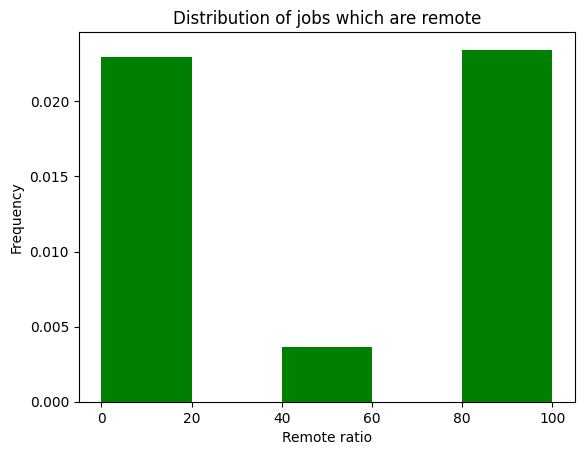

In [50]:
plt.hist(x=num['remote_ratio'],bins=5,density=True,color="green")
plt.xlabel('Remote ratio')
plt.ylabel('Frequency')
plt.title('Distribution of jobs which are remote')
plt.show()

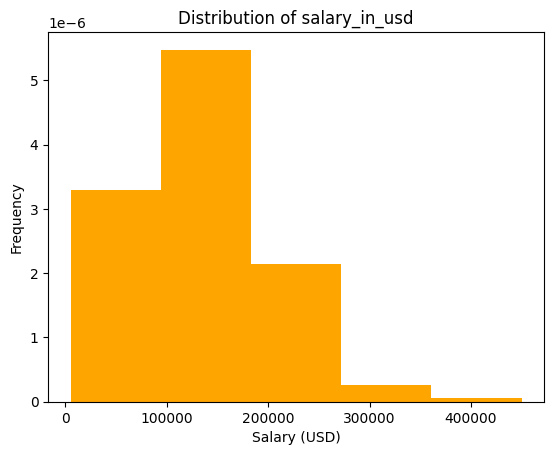

In [51]:
plt.hist(x=num['salary_in_usd'],bins=5,density=True,color="orange")
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of salary_in_usd')
plt.show()

 Are there significant differences in salaries between full-time, part-time, and contractual employees?


Text(0.5, 1.0, 'Salary Distribution by Employment Type')

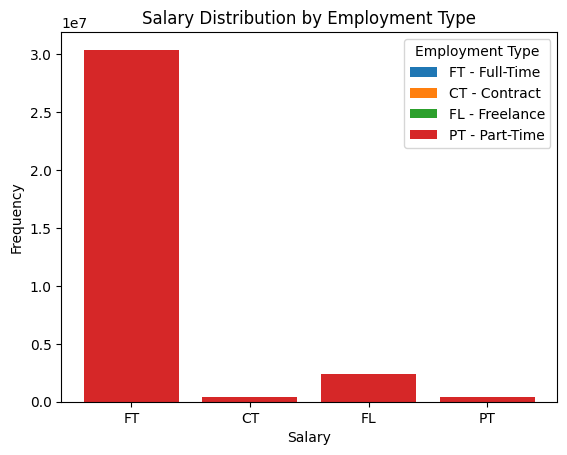

In [52]:
employment_type_mapping = {
    'FT': 'Full-Time',
    'CT': 'Contract',
    'FL': 'Freelance',
    'PT': 'Part-Time'
}
for employment_type, data in d1.groupby('employment_type'):
 plt.bar(d1['employment_type'],d1['salary'],label="employment_type_mapping")
legend_labels = [f'{abbreviation} - {full_form}' for abbreviation, full_form in employment_type_mapping.items()]
plt.legend(legend_labels, title='Employment Type')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution by Employment Type')

In [53]:
d1['salary'].min()

6000

In [54]:
d1['salary'].max()

30400000

Salary Distribution by Experience Level: How does the salary vary with different experience levels?

In [55]:
salaries_thousands = d1['salary']/ 1000
salary_labels = [f'${salary/1000:.1f}K' for salary in d1['salary']]
employ={
'EX':'Executive',
'EN':'Entry',
'SE':'Senior executive',
'MI':'Manager',
}
d1['employment_labels'] = d1['experience_level'].map(employ)

Text(0.5, 1.0, 'Salary by experience Level')

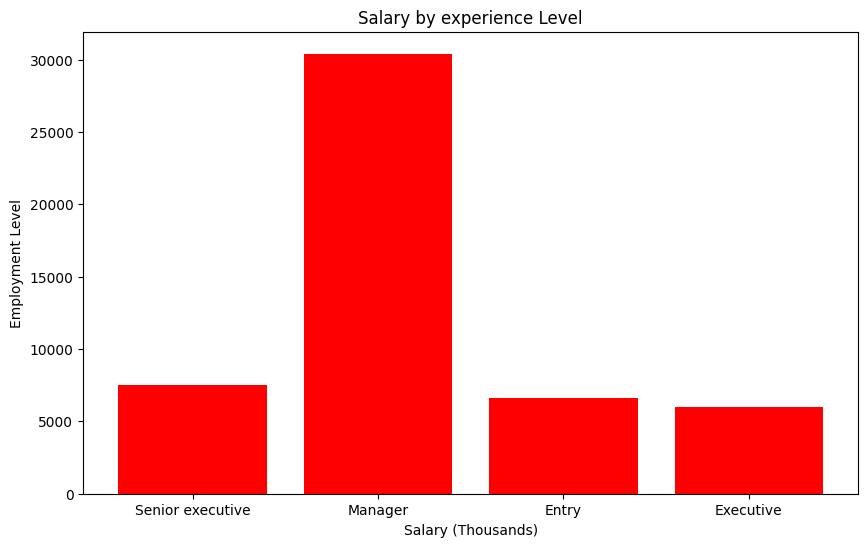

In [56]:
plt.figure(figsize=(10, 6))  # Adjust the size as needed

plt.bar(d1['employment_labels'],salaries_thousands,color='red')

plt.xlabel('Salary (Thousands)')
plt.ylabel('Employment Level')
plt.title('Salary by experience Level')


<Axes: ylabel='count'>

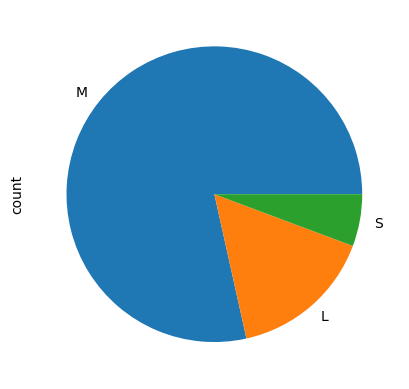

In [57]:
d1['company_size'].value_counts().plot(kind='pie')

What is the distribution of salaries across different job titles?

In [58]:
d1['job_title'].value_counts()

job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: count, Length: 93, dtype: int64

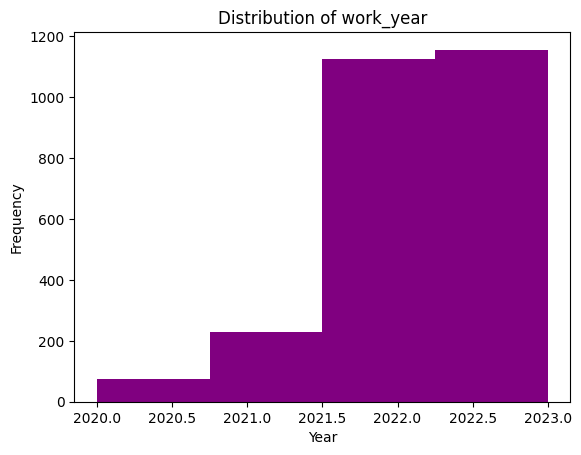

In [59]:
plt.hist(d1['work_year'], bins=len(d1['work_year'].unique()),color="purple")
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of work_year')
plt.show()


**MULTI-VARIATE ANALYSIS**


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8492\2962066573.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d1['remote_ratio'],shade=True)


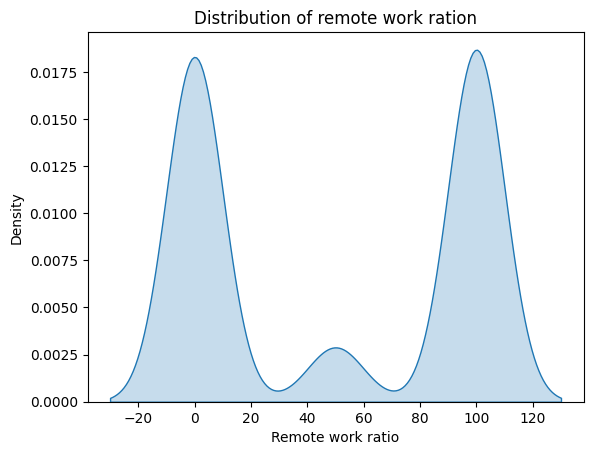

In [60]:
sns.kdeplot(d1['remote_ratio'],shade=True)
plt.xlabel('Remote work ratio')
plt.ylabel('Density')
plt.title('Distribution of remote work ration')
plt.show()

<!-- Multivariate Analysis:
Correlation Analysis: Determine if there's any correlation between salary and other numerical features like work_year, remote_ratio, or company_size.

Salary by Job Title and Experience Level: Analyze how salary varies with job title and experience level simultaneously. Are there specific job titles that offer higher salaries regardless of experience?

Remote Work Impact on Salary: 

Company Location and Salary: Explore whether company location has any influence on salary, considering factors like job title, experience level, and company size.

Company Size and Salary: Examine how company size affects salary, taking into account job title, experience level, and company location.


Employment Type and Salary:  -->

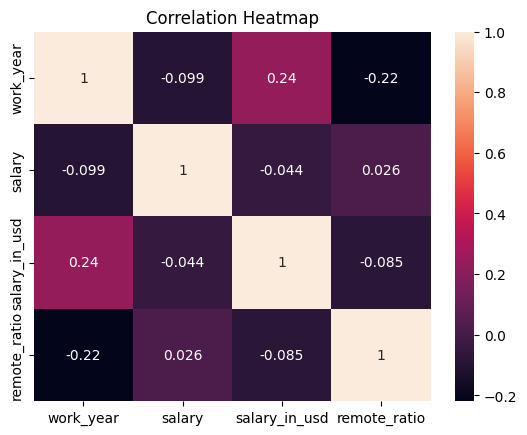

In [61]:
corr_matrix=num.corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Heatmap')
plt.show()

CORRELATION WITH WORK YEAR AND SALARY IN USD 

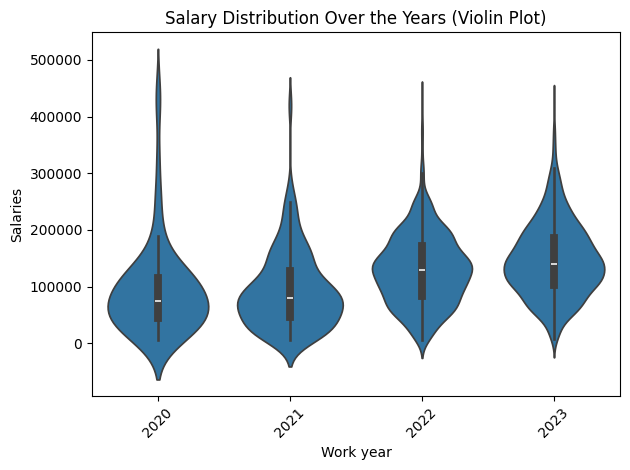

In [62]:
sns.violinplot(x=d1['work_year'],y=d1['salary_in_usd'])
plt.xlabel("Work year")
plt.ylabel("Salaries")
plt.title('Salary Distribution Over the Years (Violin Plot)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.tight_layout()
plt.show()

Box plot: It displays the distribution of salaries using quartiles, with the box showing the interquartile range (IQR) and the whiskers extending to show the rest of the distribution.
Violin plot: It combines a box plot with a kernel density estimation (KDE) plot to show the distribution of salaries more comprehensively.

Investigate if there's a relationship between remote work ratio and salary, considering job title and experience level.

In [63]:
grp=d1.groupby(['job_title','experience_level']).agg({
    'remote_ratio':'mean',
    'salary':'mean'
})
grp

remote_ratio         salary
job_title                     experience_level                             
3D Computer Vision Researcher EN                   50.000000   35000.000000
                              MI                   50.000000  400000.000000
                              SE                   50.000000   10000.000000
AI Developer                  EN                   41.666667  127666.666667
                              MI                   50.000000  150000.000000
...                                                      ...            ...
Research Scientist            SE                   26.470588  171545.000000
Software Data Engineer        MI                  100.000000  100000.000000
                              SE                   50.000000   50000.000000
Staff Data Analyst            EX                    0.000000   15000.000000
Staff Data Scientist          SE                  100.000000  105000.000000

[192 rows x 2 columns]

Text(0.5, 1.0, 'Mean of remote work and salary distribution of job profile and experience level')

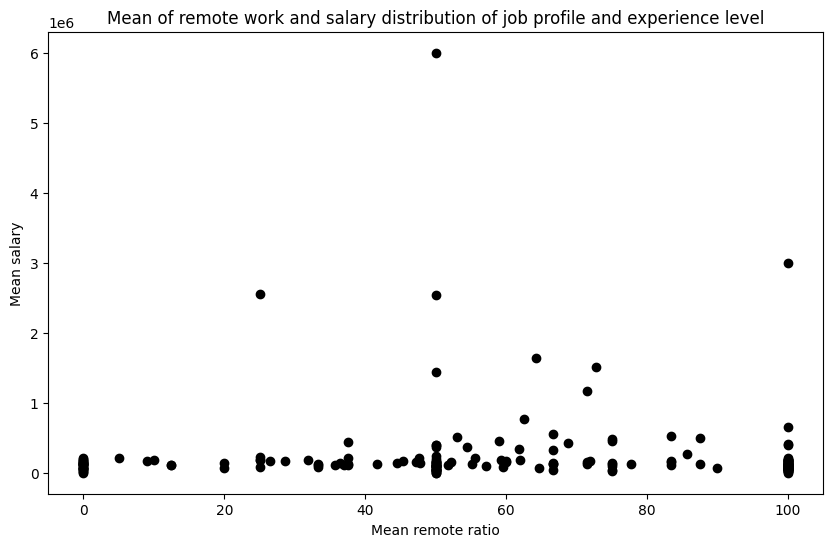

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(grp['remote_ratio'],grp['salary'],color="black")
plt.xlabel("Mean remote ratio")
plt.ylabel("Mean salary")
plt.title("Mean of remote work and salary distribution of job profile and experience level")

**Investigate how employment type (full-time, part-time, contractual) influences salary, considering other factors like job title, experience level, and remote work ratio.**

In [65]:
grp1=d1.groupby(['employment_type','experience_level']).agg({
    'remote_ratio':'mean',
    'salary':'mean'
})
grp1

remote_ratio         salary
employment_type experience_level                             
CT              EN                  100.000000   64500.000000
                EX                  100.000000  416000.000000
                MI                   90.000000   78600.000000
                SE                  100.000000   97500.000000
FL              EN                  100.000000   75000.000000
                MI                   60.000000  515511.000000
                SE                   66.666667   53333.333333
FT              EN                   57.936508  208954.654762
                EX                   46.315789  250956.136842
                MI                   49.615975  276604.488479
                SE                   49.193028  181819.211750
PT              EN                   78.571429   60677.428571
                MI                   66.666667  169666.666667

Text(0.5, 1.0, 'Mean of remote work and salary distribution of experience level and employment type')

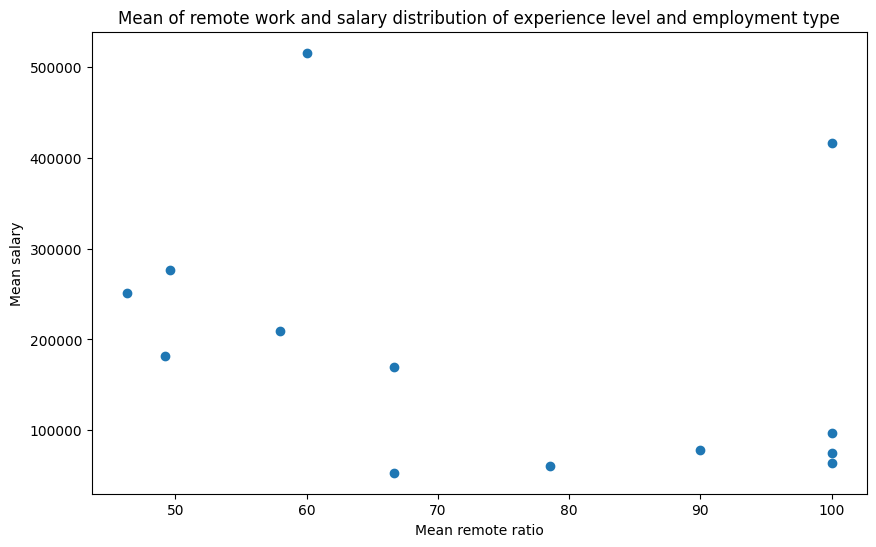

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(grp1['remote_ratio'],grp1['salary'])
plt.xlabel("Mean remote ratio")
plt.ylabel("Mean salary")
plt.title("Mean of remote work and salary distribution of experience level and employment type")

In [67]:
d1.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employment_labels
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Senior executive
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Manager
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Manager
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Senior executive
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Senior executive


In [68]:
avg_sal=d1.groupby(['employee_residence']).agg({'salary':'mean'})
print("Average salary according to employee_residence ")
avg_sal

Average salary according to employee_residence 


,salary
employee_residence,
AE,100000.000000
AM,50000.000000
AR,35500.000000
AS,32777.500000
AT,65833.333333
...,...
TR,114600.000000
UA,57850.000000
US,153972.206550


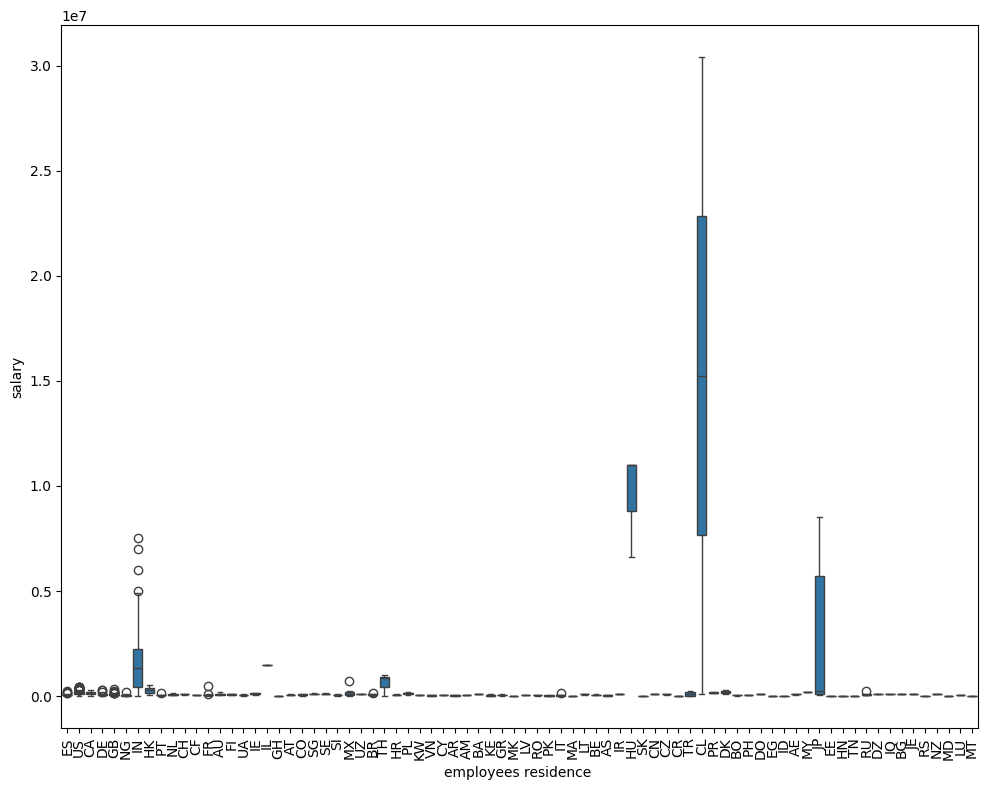

In [69]:
plt.figure(figsize=(10,8))
sns.boxplot(x=d1['employee_residence'],y=d1['salary'])
plt.xlabel("employees residence ")
plt.ylabel("salary")
plt.xticks(rotation=90)
plt.tight_layout()



**FROM THIS CHART , WE CAN SEE THAT MOST EMPLOYEES IN DATA SCIENCE OB SECTOR ARE FROM INDIA,CL: Chile, SK: Slovakia , JP: Japan, TH: Thailand**

In [70]:
job=d1.groupby(['job_title']).agg({'salary':'mean'})
print("Average salary according to job profile\n ")
job

Average salary according to job profile
 


,salary
job_title,
3D Computer Vision Researcher,120000.000000
AI Developer,137181.818182
AI Programmer,55000.000000
AI Scientist,275312.500000
Analytics Engineer,149001.758242
...,...
Research Engineer,165510.727273
Research Scientist,152924.600000
Software Data Engineer,75000.000000


In [71]:
top20=job.sort_values(by='salary',ascending=False).head(10)
top20

,salary
job_title,
Head of Machine Learning,6.000000e+06
Principal Data Architect,3.000000e+06
Lead Machine Learning Engineer,2.548667e+06
Lead Data Scientist,9.284853e+05
Data Analytics Lead,9.225000e+05
BI Data Analyst,8.366448e+05
Head of Data Science,7.037294e+05
Lead Data Analyst,6.550000e+05
ML Engineer,6.099979e+05


In [72]:
job_profile=top20.index.tolist()
job_profile
#

['Head of Machine Learning',
 'Principal Data Architect',
 'Lead Machine Learning Engineer',
 'Lead Data Scientist',
 'Data Analytics Lead',
 'BI Data Analyst',
 'Head of Data Science',
 'Lead Data Analyst',
 'ML Engineer',
 'Product Data Analyst']

**HERE WE HAVE TOP 10 JOB PROFILES IN DATA SCIENCE FIELD WHICH ARE HIGH PAYING IN LAST 2 YEARS**

([<matplotlib.patches.Wedge at 0x237d0701660>,
 [Text(0.46499164719528335, 0.9968865371939865, 'Head of Machine Learning'),
  Text(-1.0489960661244115, 0.331069861593455, 'Principal Data Architect'),
  Text(-0.8098549557924968, -0.7444024117225394, 'Lead Machine Learning Engineer'),
  Text(-0.18620822756873043, -1.0841247603415909, 'Lead Data Scientist'),
  Text(0.19676538312975717, -1.0822584645091948, 'Data Analytics Lead'),
  Text(0.5393235003664493, -0.9587127630069815, 'BI Data Analyst'),
  Text(0.7918823994607613, -0.7634934612845532, 'Head of Data Science'),
  Text(0.9598747688105683, -0.5372526670020895, 'Lead Data Analyst'),
  Text(1.0598217701772932, -0.2945807452266171, 'ML Engineer'),
  Text(1.0966647445922229, -0.08559461413240167, 'Product Data Analyst')],
 [Text(0.2536318075610636, 0.5437562930149016, '36.11%'),
  Text(-0.5721796724314971, 0.18058356086915722, '18.05%'),
  Text(-0.4417390667959073, -0.40603767912138505, '15.34%'),
  Text(-0.1015681241283984, -0.591340778

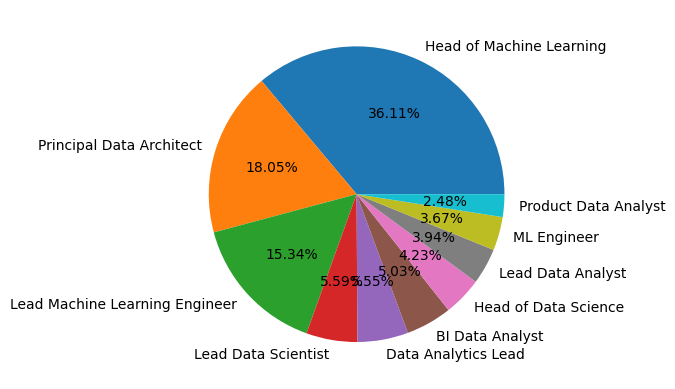

In [73]:
plt.pie(top20['salary'],labels=job_profile,autopct='%1.2f%%')


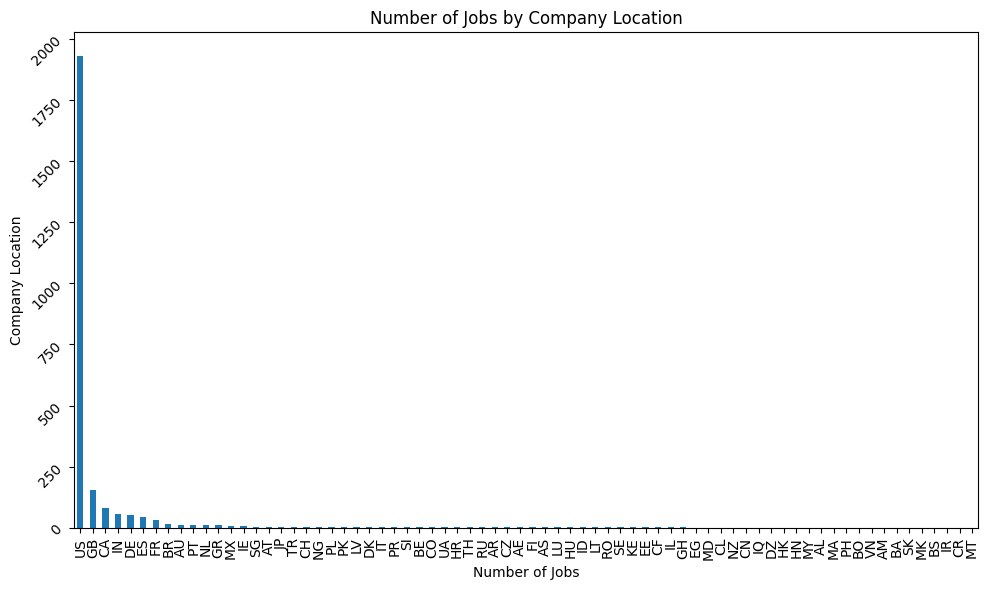

In [74]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
d1['company_location'].value_counts().plot(kind='bar')

plt.xlabel('Number of Jobs')
plt.ylabel('Company Location')
plt.title('Number of Jobs by Company Location')
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

**From this graph we can conclude that US,GB: United Kingdom (Great Britain),CA: Canada,IN: India,DE: Germany** have more jobs and employement in the sector of data science field than many other countries

Salary Conversion Impact: Analyze how salary conversion to a common currency affects the salary distribution and whether it reveals any patterns across different job titles, experience levels, or company locations.


In [75]:
sal_conv=d1.groupby(['job_title','company_location','experience_level']).agg({
    'salary':'mean',
    'salary_in_usd':'mean'
})
sal_conv

salary  \
job_title                     company_location experience_level                  
3D Computer Vision Researcher AL               SE                 10000.000000   
                              AS               EN                 20000.000000   
                              CR               EN                 50000.000000   
                              IN               MI                400000.000000   
AI Developer                  BA               EN                120000.000000   
...                                                                        ...   
Research Scientist            US               SE                176247.407407   
Software Data Engineer        AU               SE                 50000.000000   
                              SG               MI                100000.000000   
Staff Data Analyst            CA               EX                 15000.000000   
Staff Data Scientist          US               SE                105000.000000   

                                                                 salary_in_usd  
job_title                     company_location experience_level                 
3D Computer Vision Researcher AL               SE                 10000.000000  
                              AS               EN                 20000.000000  
                              CR               EN                 50000.000000  
                              IN               MI                  5409.000000  
AI Developer                  BA               EN                120000.000000  
...                                                                        ...  
Research Scientist            US               SE                176247.407407  
Software Data Engineer        AU               SE                 50000.000000  
                              SG               MI                 75020.000000  
Staff Data Analyst            CA               EX                 15000.000000  
Staff Data Scientist          US               SE                105000.000000  

[477 rows x 2 columns]

In [76]:
s1=d1.groupby(['employment_labels']).agg({'salary':'mean',
    'salary_in_usd':'mean'})
s1

,salary,salary_in_usd
employment_labels,,
Entry,199203.914815,72648.685185
Executive,252675.343750,191078.208333
Manager,276429.332831,101828.783133
Senior executive,181462.650579,153897.435650


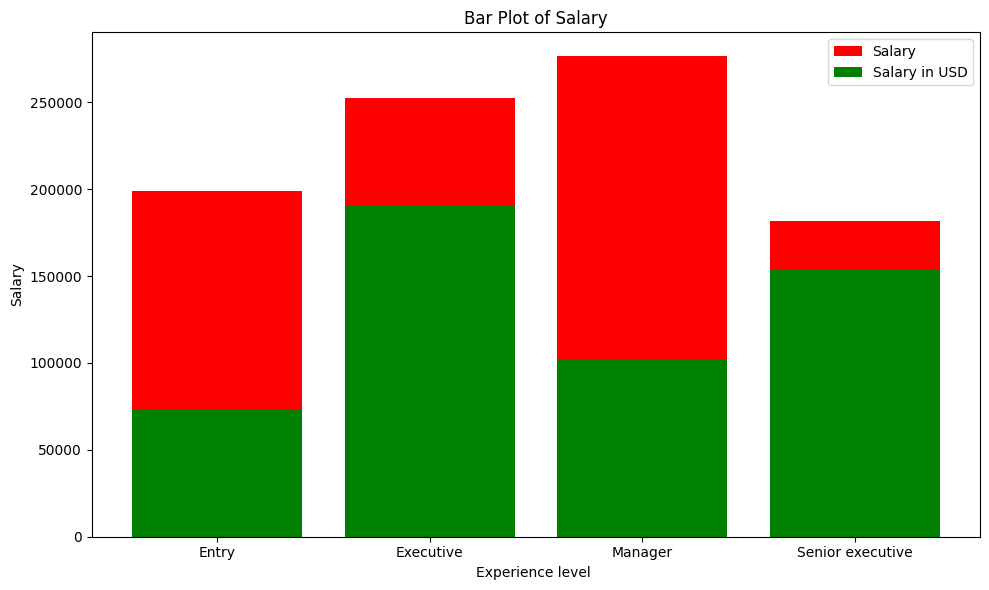

In [77]:
l1=s1.index.tolist()
plt.figure(figsize=(10, 6))
plt.bar(x=l1, height=s1['salary'],color="red",label="Salary")
plt.bar(x=l1,height=s1['salary_in_usd'],color="green",label="Salary in USD")
plt.xlabel('Experience level ')  # Replace 'X Axis Label' with appropriate label for your data
plt.ylabel('Salary')
plt.title('Bar Plot of Salary')

plt.legend()  # Add legend
plt.tight_layout()
plt.show()

**Here i can conclude that salary of executive is much higher than of manager in dollers and there is significant impact on salaries when converted into USD**

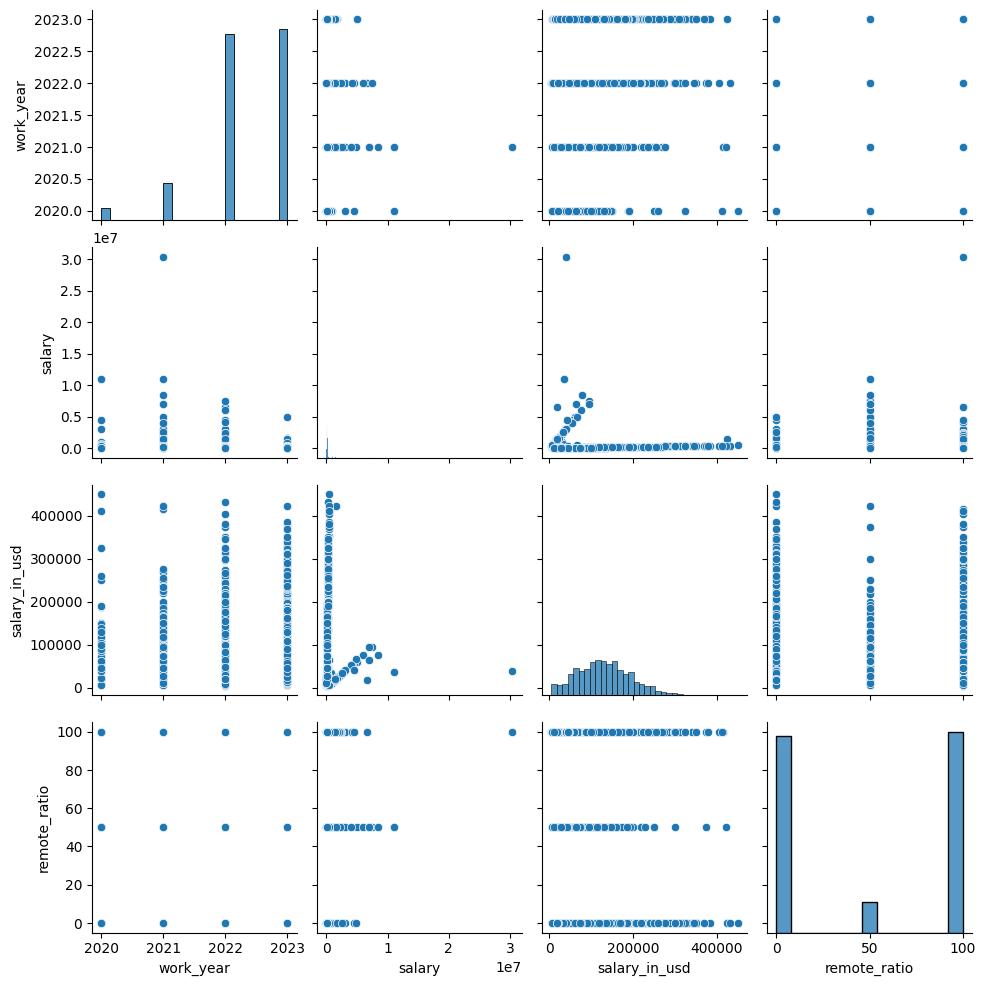

In [78]:
sns.pairplot(num)

Significance of EDA:

Exploratory data analysis (EDA) plays a crucial role in the data analysis process, providing valuable insights and guiding subsequent steps in the analysis. Its significance lies in several key aspects:

Understanding the Data: EDA helps in gaining a deeper understanding of the dataset, its characteristics, and underlying structure. This understanding is essential for making informed decisions and deriving meaningful insights from the data.

Detecting Patterns and Trends: By exploring relationships and correlations between variables, EDA helps in identifying patterns and trends within the data. These patterns can provide valuable insights into underlying phenomena and guide further analysis.

Identifying Outliers and Anomalies: EDA helps in identifying outliers and anomalies that may require further investigation. Detecting and addressing these outliers is crucial for maintaining the integrity and reliability of the analysis results.

Informing Feature Selection and Engineering: Through feature engineering and dimensionality reduction techniques, EDA informs the selection and creation of features that are most relevant and informative for the analysis.

Improving Model Performance: By providing insights into the data distribution, relationships, and patterns, EDA can help in selecting appropriate modeling techniques and improving the performance of predictive models.

**CONCLUSION:**

*In conducting exploratory data analysis (EDA) on the dataset pertaining to the data science job sector, several key findings have emerged. The analysis revealed insights into the top 10 highest-paying job titles within the data science sector, prevalent company locations, salary distributions based on experience level and employment type, and the prevalence of remote work arrangements. These findings offer valuable insights into the landscape of the data science job sector, aiding in informed decision-making and strategic planning within the industry.*
